### Задача 1:
На отрезке [2; 3] найти минимальное значение функции F(a).
$$F(a) = \int_{1}^{2} erf(\alpha x) J_0(\alpha x) J_1(x/\alpha) \,dx$$

### Решение на языке Python:

In [3]:
from scipy.integrate import quad
from scipy.special import jn, erf
from scipy.optimize import minimize


def F(a):
    print(quad(lambda x: erf(a*x) * jn(0, a*x) * jn(1, x/a), 1, 2))
    return quad(lambda x: erf(a*x) * jn(0, a*x) * jn(1, x/a), 1, 2)[0]

x0 = 2.5
result = minimize(F, x0, bounds=[(2, 3)], method="slsqp")

print(f"Минимальное значение функции F(a): {result.fun}")
print(f"Значение параметра а, при котором достигается минимум: {result.x[0]}")


(-0.08760810077668346, 9.726453062595503e-16)
(-0.08760810004149538, 9.726452980973231e-16)
(-0.0898118462725615, 9.971117961589282e-16)
(-0.08981184567917948, 9.971117895710644e-16)
(-0.09312520887353172, 1.0468233603031402e-15)
(-0.09312520901505698, 1.0468233582098621e-15)
(-0.09327856595701435, 1.0431602984805737e-15)
(-0.09327856593634874, 1.0431602962640803e-15)
(-0.09328204887547442, 1.0438523313888852e-15)
(-0.09328204887492042, 1.0438523293841461e-15)
Минимальное значение функции F(a): -0.09328204887547442
Значение параметра а, при котором достигается минимум: 2.285013878132655


### Задача 2:

Решить на отрезке [0,2] дифференциальное уравнение третьего порядка, приведя его к системе уравнений первого порядка. Вывести график решения.  
$$y'''+4y''+4y'+y=0$$
$$y(0)=0, \quad y'(0)=y''(0)=1$$

### Решение:
Для начала необходимо привести данное дифференциальное уравнение 3-го порядка к системе уравнений 1-го порядка.  
Положим, что
\begin{cases}
    y_1=y\\
    y_2=y'\\
    y_3=y''
\end{cases}

Тогда наше дифференциальное уравнение примет следующий вид:
\begin{cases}
    y_1'=y_2\\
    y_2'=y_3\\
    y_3'=-4y_3-4y_2-y_1
\end{cases}

### Реализация дальнейшнего решения на языке Python:

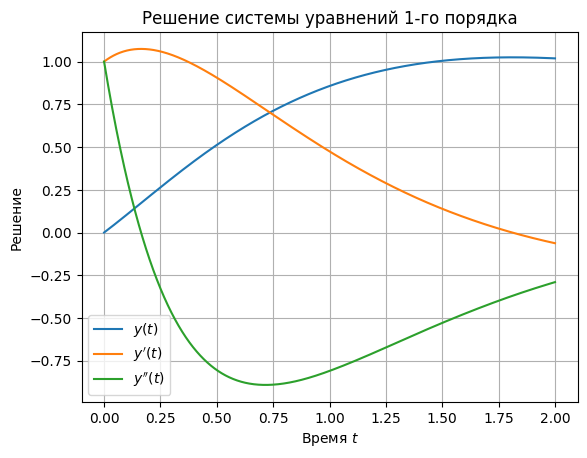

In [13]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


def equation(t, y):
    y1, y2, y3 = y
    return [y2, y3, -4*y3 - 4*y2 - y1]

initial_condition = [0, 1, 1]

section = [0, 2]

solution = solve_ivp(equation, section, initial_condition, t_eval=np.linspace(0, 2, 1000))

t = solution.t
y = solution.y

plt.plot(t, y[0], label='$y(t)$')
plt.plot(t, y[1], label="$y'(t)$")
plt.plot(t, y[2], label="$y''(t)$")
plt.xlabel('Время $t$')
plt.ylabel('Решение')
plt.title('Решение системы уравнений 1-го порядка')
plt.legend()
plt.grid(True)
plt.show()